# Applied Computational Statistics (ACS)

## SW4

Submit your answers <b>individually</b>.

Make sure to follow all the prescribed naming conventions set in the code below.

Instructions:

1. You may use `sklearn.linear_model.LinearRegression`.


2. You may use `scipy.stats.t`.


2. You may NOT use `statsmodels`. I use this to check your answers.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import t

atol = 1e-06
rtol = 1e-05

---

### Linear Regression t-Test 

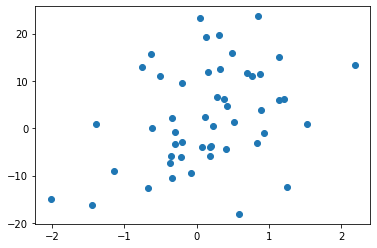

In [83]:
# set seed
np.random.seed(1)

# hyperparameters
n = 50

# true parameters (we don't know this!)
mu, sigma = 0, 10
b0 = 2
b1 = 5

# generate data
e = np.random.normal(loc=mu, scale=sigma, size=(n, 1))
x = np.random.normal(loc=0, scale=1, size=(n, 1))
y = b0 + b1*x + e

plt.scatter(x, y)
plt.show()

#### Q1.

Calculate the OLS estimates for the simple linear regression model,

\begin{align*}
    y = \beta_0 + \beta_1 x + \varepsilon
\end{align*}

using the data provided.

In [84]:
#### Solving with sklearn

model = LinearRegression().fit(x, y)
b1_hat = model.coef_[0][0]
b0_hat = model.intercept_[0]

print(b1_hat)
print(b0_hat)

4.7205085907174675
1.7858474741607693


In [85]:
#### Solving with sklearn

model = LinearRegression().fit(x, y)
print('Slope: ', model.coef_[0][0])
print('Intercept: ', model.intercept_[0])

Slope:  4.7205085907174675
Intercept:  1.7858474741607693


In [86]:
#### Solving analytically
#### for multiple linear regression, beta = (X.T @ X)^-1 @ X.T @ y

N = x.shape[0]
p = x.shape[1] + 1  # plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = x

beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
print('Intercept: ', beta_hat[0][0])
print('Slope: ', beta_hat[1][0])

Intercept:  1.785847474160769
Slope:  4.720508590717469


In [87]:
### testing with assert

import statsmodels.api as sm

model_ols = sm.OLS(y, sm.add_constant(x))
results = model_ols.fit()

#### checking OLS estimates (hidden assert)

print('intercept', results.params[0])
print('slope', results.params[1])

assert np.isclose(results.params[0], beta_hat[0][0], atol=atol) ### analytically derived intercept
assert np.isclose(results.params[1], beta_hat[1][0], atol=atol) ### analytically derived slope

assert np.isclose(results.params[0], model.intercept_[0], atol=atol) ### sklearn calculated intercept
assert np.isclose(results.params[1], model.coef_[0][0], atol=atol) ### sklearn calculated slope

intercept 1.7858474741607693
slope 4.7205085907174675


In [ ]:
# Hidden Test

In [ ]:
# Hidden Test

The <b>t-statistic</b> is defined as,

\begin{align*}
    \frac{\hat{\theta} - \theta_0}{\mathbf{\text{s.e.}}(\hat{\theta})}
\end{align*}

In the context of linear regression, $\hat{\theta}$ is our parameter estimate, $\theta_0$ is the null hypothesis being tested, and $\mathbf{\text{s.e.}}(\hat{\theta})$ is the <b>standard error</b> of $\hat{\theta}$. 

Recall that the standard error is the standard deviation of the sampling distribution of a statistic.

For this hypothesis test, we wish to know if there is a significant linear relationship between the independent variable $X$ and the dependent variable $Y$. The null hypothesis is that there is no relationship,

\begin{align*}
    H_0 &: \hat{\theta} = 0\\ 
    H_1 &: \hat{\theta} \neq 0
\end{align*}

#### Q2.

Calculate the t-statistics for both the slope $\hat{\beta}_1$ and intercept $\hat{\beta}_0$.

In [88]:
N = x.shape[0]
p = x.shape[1] + 1 

y_hat = model.predict(x)
residuals = y - y_hat
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat

b1_hat_tstat = beta_hat[1][0] / var_beta_hat[1, 1] ** 0.5
b0_hat_tstat = beta_hat[0][0] / var_beta_hat[0, 0] ** 0.5
print(b1_hat_tstat)
print(b0_hat_tstat)

2.639575270922254
1.254543519017386


In [89]:
# Unhidden Test
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

assert np.isclose(b1_hat_tstat, results.tvalues[1])

In [90]:
# Unhidden Test
assert np.isclose(b0_hat_tstat, results.tvalues[0])

The t-statistic follows the [`Student's t-distribution`](https://en.wikipedia.org/wiki/Student%27s_t-distribution). This distribution has a single parameter: $\nu$ degrees of freedom. For linear regression,

\begin{align*}
    \frac{\hat{\theta} - \theta_0}{\mathbf{\text{s.e.}}(\hat{\theta})} \sim t(\nu = n - p - 1)
\end{align*}

where $p$ is the number of features or independent variables. Since we are using a simple linear regression, $p=1$.

#### Q3.

Calculate the p-values for the t-statistics of $\hat{\beta}_1$ and $\hat{\beta}_0$.

In [91]:
p = 1
df = N - p - 1

### multiply p-value by 2 since t.sf() returns p-value for a one-sided t-test
b1_hat_pvalue = t.sf(b1_hat_tstat, df) * 2
b0_hat_pvalue = t.sf(b0_hat_tstat, df) * 2

print(b1_hat_pvalue)
print(b0_hat_pvalue)

0.011162888194067204
0.21571911746538672


In [92]:
# Unhidden Test
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

assert np.isclose(b1_hat_pvalue, results.pvalues[1])

In [93]:
# Unhidden Test
assert np.isclose(b0_hat_pvalue, results.pvalues[0])